In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/daily_gold_rate.csv')

In [3]:
df.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1/1/1985,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1/2/1985,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1/3/1985,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1/4/1985,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1/7/1985,298.25,392.55,261.17,3741.23,1091.58,835.8


In [7]:
df.info

<bound method DataFrame.info of             Date      USD      EUR      GBP        INR      AED       CNY
0       1/1/1985   308.30   402.45   266.01    3825.85  1134.42       NaN
1       1/2/1985   305.50   401.49   266.00    3787.05  1134.42       NaN
2       1/3/1985   302.30   397.08   262.76    3718.88  1107.67       NaN
3       1/4/1985   303.15   397.15   262.58    3759.64  1118.21       NaN
4       1/7/1985   298.25   392.55   261.17    3741.23  1091.58    835.80
...          ...      ...      ...      ...        ...      ...       ...
10109  10/2/2023  1833.05  1747.59  1513.92  152333.60  6732.79  13377.60
10110  10/3/2023  1822.45  1741.97  1509.28  151684.52  6693.86  13300.24
10111  10/4/2023  1818.95  1730.36  1496.83  151375.75  6680.82  13274.70
10112  10/5/2023  1819.45  1726.89  1493.80  151431.00  6682.84  13278.35
10113  10/6/2023  1819.60  1720.01  1487.33  151268.44  6683.39  13278.35

[10114 rows x 7 columns]>

In [8]:
df.describe()

,USD,EUR,GBP,INR,AED,CNY
count,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10110.000000
mean,799.552704,669.997853,540.951871,43928.065703,2936.556642,5307.108772
std,544.858424,463.177911,418.160576,43583.244790,2001.379712,3659.619165
min,252.800000,222.200000,156.890000,3687.170000,928.480000,809.630000
25%,356.612500,307.290000,221.532500,11748.690000,1310.965000,2220.950000
50%,440.525000,375.070000,265.350000,18305.155000,1617.855000,3376.265000
75%,1270.450000,1063.837500,884.762500,79378.062500,4666.365000,8326.245000
max,2067.150000,1863.680000,1634.970000,167324.360000,7592.640000,14373.930000


In [9]:
df.dtypes

Date     object
USD     float64
EUR     float64
GBP     float64
INR     float64
AED     float64
CNY     float64
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.dtypes

Date    datetime64[ns]
USD            float64
EUR            float64
GBP            float64
INR            float64
AED            float64
CNY            float64
dtype: object

In [14]:
df.isnull().sum()

Date    0
USD     0
EUR     0
GBP     0
INR     0
AED     0
CNY     4
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Date    0
USD     0
EUR     0
GBP     0
INR     0
AED     0
CNY     0
dtype: int64

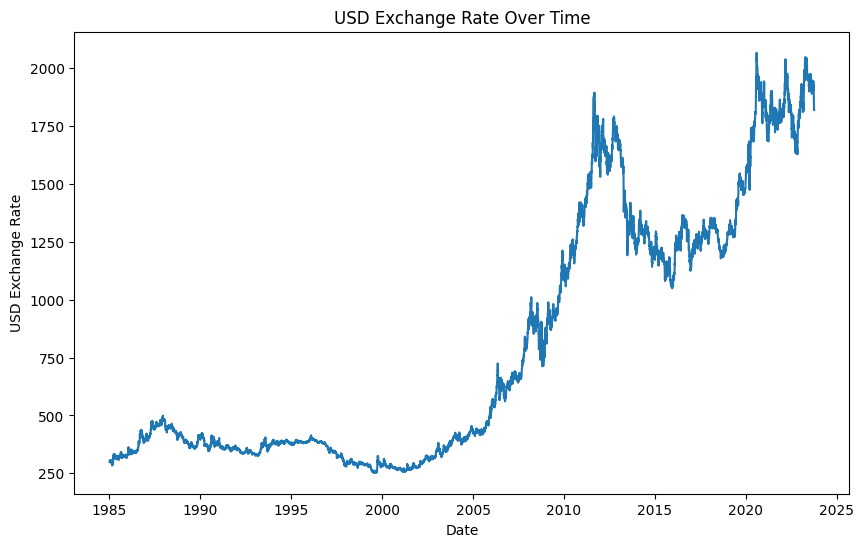

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['USD'])
plt.xlabel('Date')
plt.ylabel('USD Exchange Rate')
plt.title('USD Exchange Rate Over Time')
plt.show()

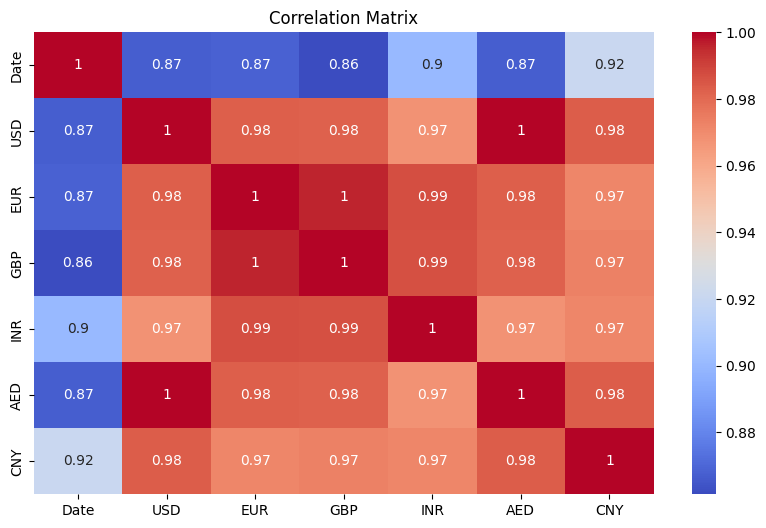

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
features = df.drop(columns=['Date', 'USD'])
target = df['USD']


# train-test-separation

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [29]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [30]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = rf.predict(X_test)


In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.606904762240341
R-squared: 0.999994578775001


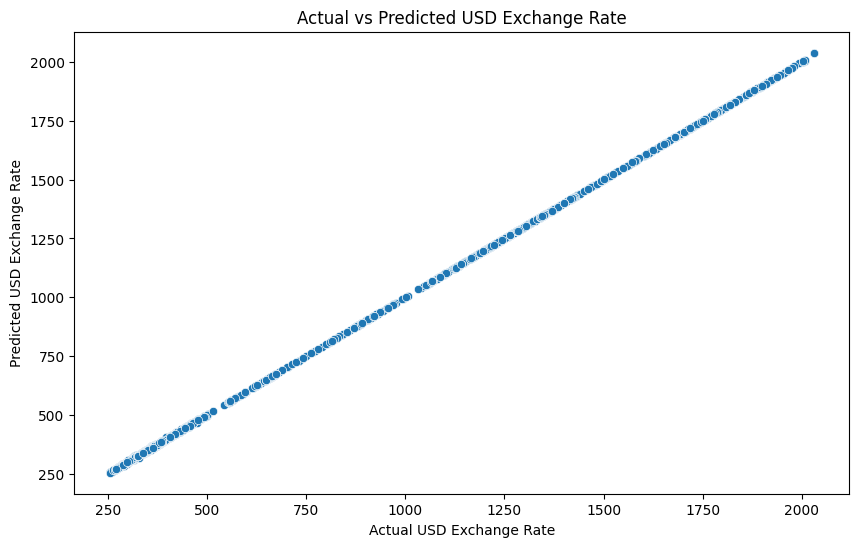

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual USD Exchange Rate')
plt.ylabel('Predicted USD Exchange Rate')
plt.title('Actual vs Predicted USD Exchange Rate')
plt.show()

In [36]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [40]:
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


c:\Users\Khush\Capstone-Project\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


c:\Users\Khush\Capstone-Project\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Best Mean Squared Error: 1.5587649744505212
Best R-squared: 0.9999947411845147


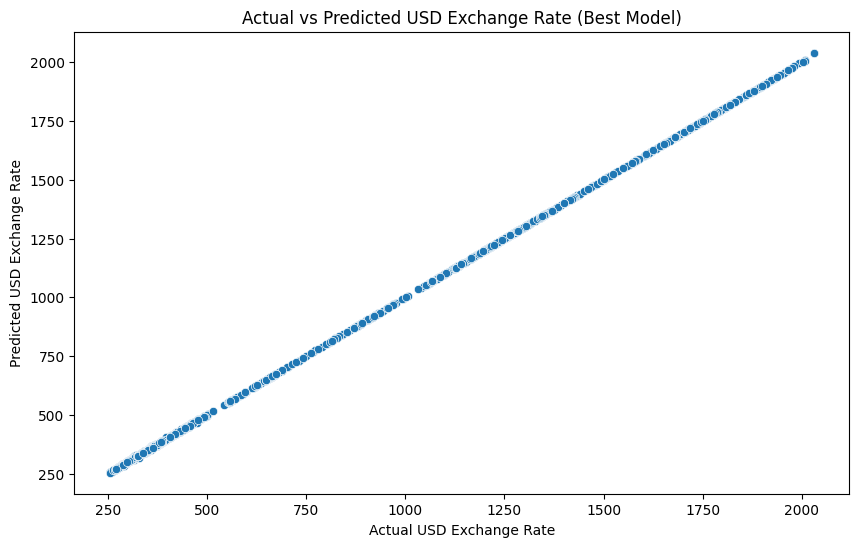

In [41]:
# Retrain with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict again with the retrained model
best_y_pred = best_rf.predict(X_test)

# Re-evaluate the retrained model
best_mse = mean_squared_error(y_test, best_y_pred)
best_r2 = r2_score(y_test, best_y_pred)

print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R-squared: {best_r2}")

# Plot the new results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=best_y_pred)
plt.xlabel('Actual USD Exchange Rate')
plt.ylabel('Predicted USD Exchange Rate')
plt.title('Actual vs Predicted USD Exchange Rate (Best Model)')
plt.show()


In [42]:
rf = RandomForestRegressor(n_estimators=30, max_depth=3, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2175.942100593258
R-squared: 0.9926590100488386


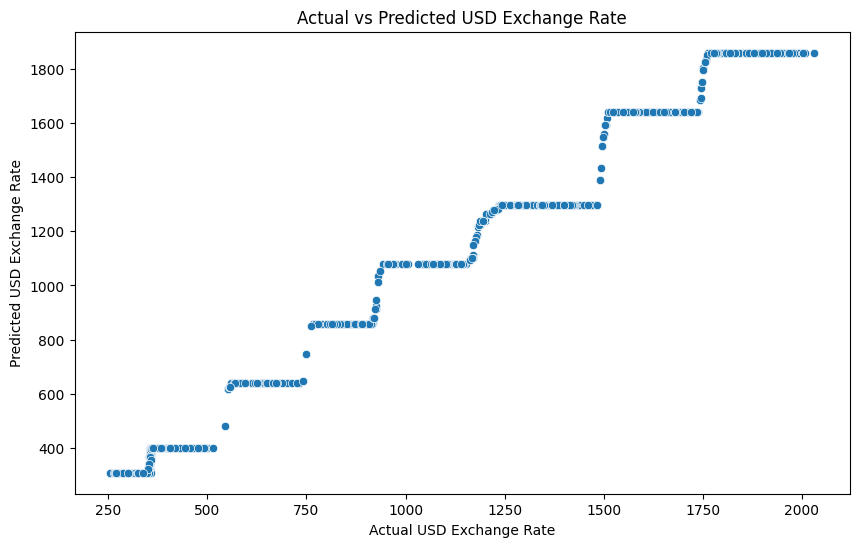

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual USD Exchange Rate')
plt.ylabel('Predicted USD Exchange Rate')
plt.title('Actual vs Predicted USD Exchange Rate')
plt.show()

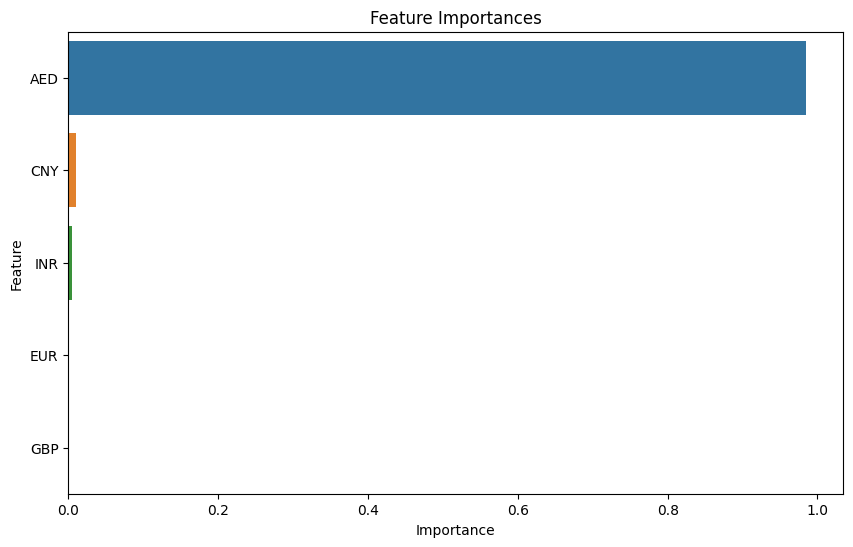

In [44]:
# Get feature importances
feature_importances = rf.feature_importances_
features_list = features.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


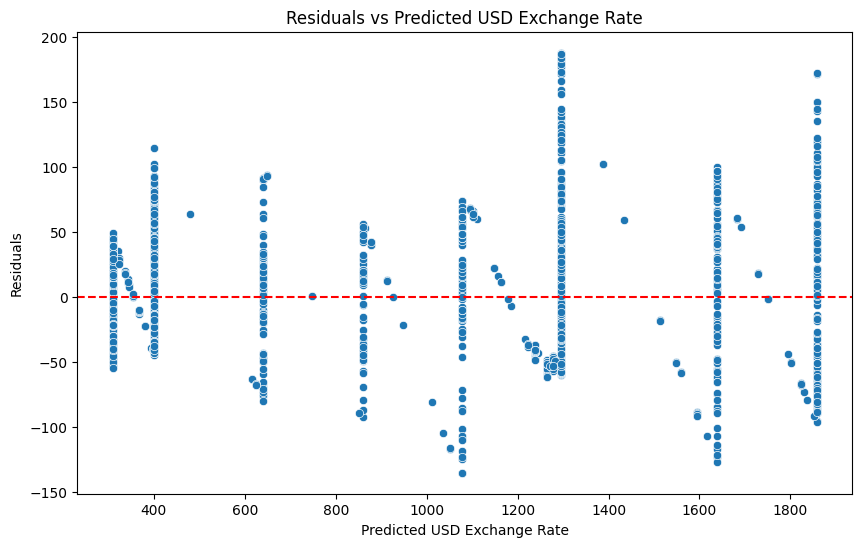

In [45]:
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted USD Exchange Rate')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted USD Exchange Rate')
plt.show()

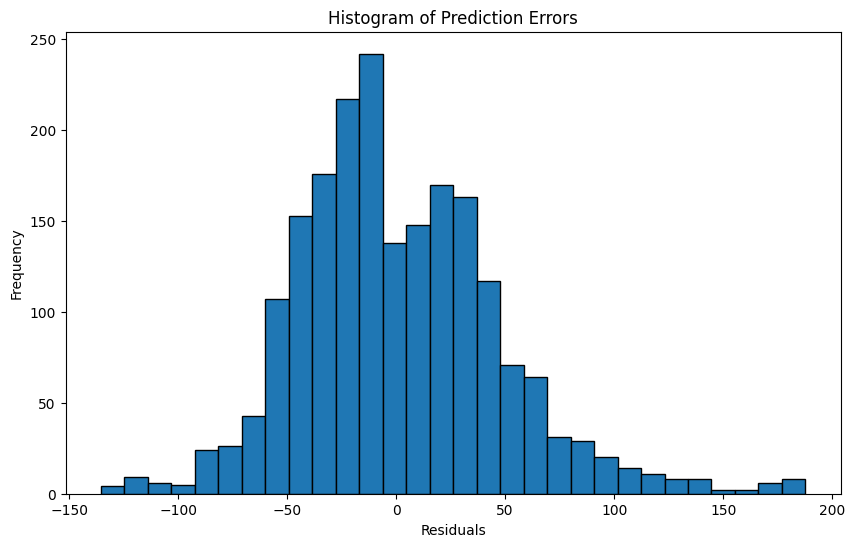

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()


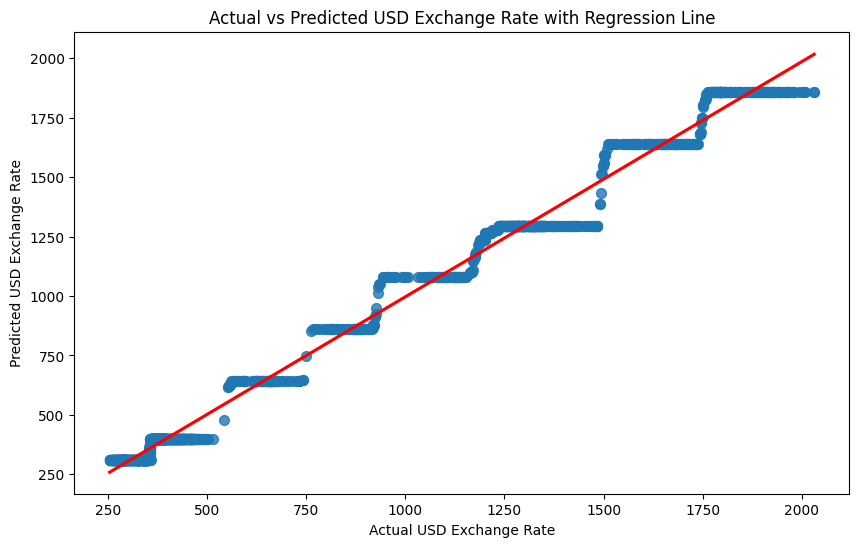

In [48]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=df_comparison, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('Actual USD Exchange Rate')
plt.ylabel('Predicted USD Exchange Rate')
plt.title('Actual vs Predicted USD Exchange Rate with Regression Line')
plt.show()

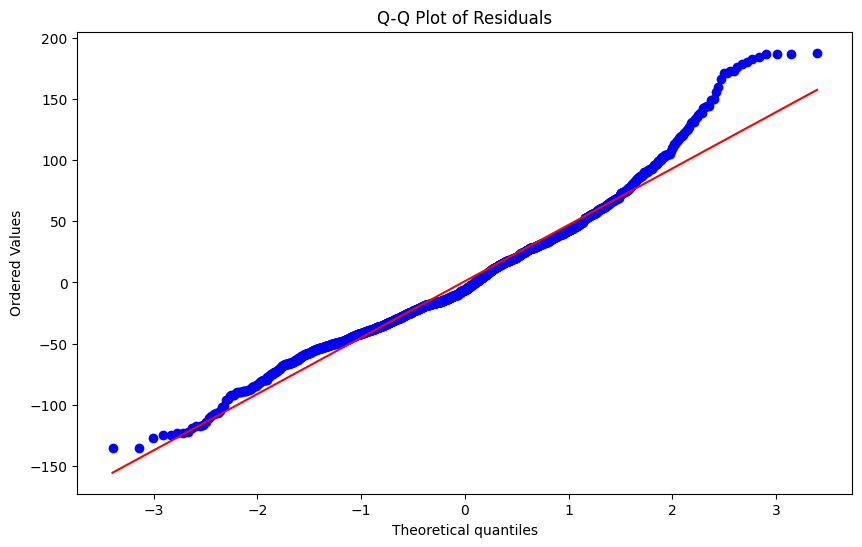

In [49]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


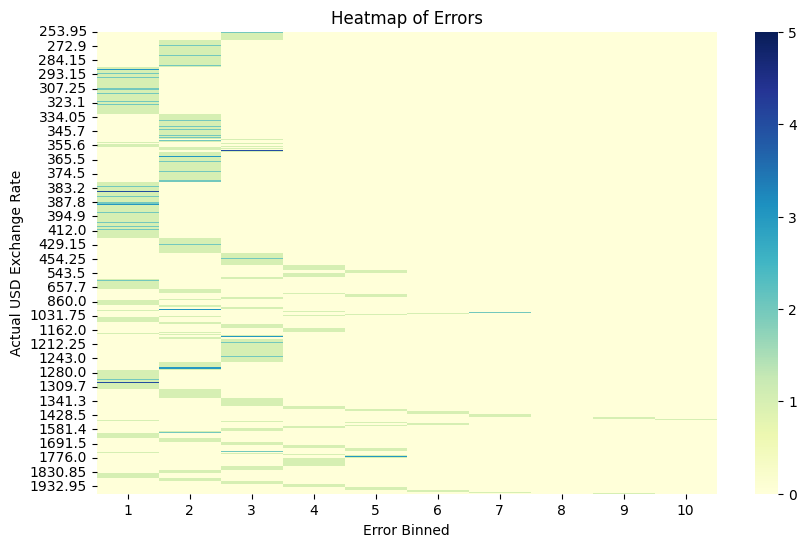

In [50]:
errors = np.abs(y_test - y_pred)
bins = np.linspace(0, np.max(errors), 10)
binned_errors = np.digitize(errors, bins)

# Create a DataFrame for plotting
error_matrix = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error Binned': binned_errors})

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(error_matrix['Actual'], error_matrix['Error Binned']), cmap='YlGnBu')
plt.xlabel('Error Binned')
plt.ylabel('Actual USD Exchange Rate')
plt.title('Heatmap of Errors')
plt.show()